## Ali Abdullah Ahmad
## CWID- 20031246

## 1 Naive Bayes Classification 

In [181]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


X , y = datasets.make_blobs ( n_samples =400 , n_features =5 , centers =4 , cluster_std =2 , random_state =100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
# Part (a): Compute the prior probability of each class, p(Ck)
unique_classes, class_counts = np.unique(y_train, return_counts=True)
prior_probabilities = class_counts / len(y_train)

print("Prior probabilities (p(Ck)): ")
for i, prob in zip(unique_classes, prior_probabilities):
    print(f"P(C{i}) = {prob:.4f}")

Prior probabilities (p(Ck)): 
P(C0) = 0.2679
P(C1) = 0.2250
P(C2) = 0.2500
P(C3) = 0.2571


In [183]:
# Part (b): Compute the likelihood of each data point, p(X|Ck)
# We assume that each feature follows a Gaussian distribution for each class
# For each class, calculate mean and variance for each feature
class_means = np.zeros((len(unique_classes), X.shape[1]))
class_variances = np.zeros((len(unique_classes), X.shape[1]))

for i, class_label in enumerate(unique_classes):
    class_data = X_train[y_train == class_label]
    class_means[i, :] = np.mean(class_data, axis=0)
    class_variances[i, :] = np.var(class_data, axis=0)

# Compute the likelihoods for each data point and each class
likelihoods = np.zeros((X_test.shape[0], len(unique_classes)))

for i in range(len(unique_classes)):
    for j in range(X_test.shape[1]):
        mean = class_means[i, j]
        variance = class_variances[i, j]
        # Calculate log likelihood for numerical stability (log p(X_j | C_k))
        likelihoods[:, i] += -0.5 * np.log(2 * np.pi * variance) - 0.5 * ((X_test[:, j] - mean) ** 2) / variance

likelihoods

array([[ -52.46643558,  -96.97362013,  -62.89983953,  -11.13524675],
       [ -48.05047342,  -94.06705755,  -10.20229966,  -59.15803447],
       [ -12.0010669 ,  -61.35574521,  -53.76465749,  -26.87782675],
       [  -9.94401548,  -78.5571179 ,  -41.78133457,  -32.09314119],
       [ -10.11621001,  -57.39888122,  -50.62032083,  -34.65334471],
       [ -57.68237996,  -11.78400989,  -56.34033534,  -79.83105064],
       [  -9.78484822,  -71.64116588,  -61.36589708,  -35.30594295],
       [ -30.97866467,  -57.03684331,  -12.94020014,  -30.13706536],
       [ -38.07288133,  -70.79192267,  -45.2359624 ,   -9.22124714],
       [ -59.19681658,   -9.27869698,  -61.12300453,  -75.95562419],
       [ -47.3164684 ,  -69.48042605,   -9.82795574,  -55.80954537],
       [ -58.18684311,   -9.45866582,  -75.5342553 ,  -80.73422242],
       [  -9.79944886,  -62.51362371,  -48.78421279,  -39.03576542],
       [ -65.49512269,   -9.82765536,  -80.06686642,  -95.65210386],
       [ -44.14321636,  -89.500646

In [184]:
# Part (c): Compute the posterior probability of each data point, p(Ck|X)
# Unnormalized posterior p(Ck|X) is proportional to p(Ck) * p(X|Ck)
unnormalized_posteriors = likelihoods + np.log(prior_probabilities)

# Assign the class with the highest unnormalized posterior
assigned_classes = np.argmax(unnormalized_posteriors, axis=1)
assigned_classes

array([3, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 0, 1, 3, 2, 3, 0, 0, 3, 1, 3,
       0, 2, 3, 1, 2, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 2, 0, 0, 1, 1, 1, 3,
       1, 3, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 2, 3, 0, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 1, 3, 1, 2, 1, 0, 3, 2, 3, 1, 1, 0, 3, 1, 0, 0,
       2, 1, 0, 1, 1, 1, 1, 3, 0, 2, 0, 0, 2, 1, 2, 3, 1, 1, 2, 3, 2, 2,
       2, 3, 1, 0, 0, 2, 0, 0, 1, 3], dtype=int64)

In [185]:
# Part (d): Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, assigned_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[25  0  0  0]
 [ 0 37  0  0]
 [ 0  0 30  0]
 [ 0  0  0 28]]


In [186]:
# Part (e): Classify using sklearn.naive_bayes.GaussianNB and report accuracy
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict using the model
y_pred = nb_model.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy using Gaussian Naive Bayes: {accuracy:.4f}")


Accuracy using Gaussian Naive Bayes: 1.0000


## 2 Perceptron

In [187]:
# Define the step function
def step(X):
    return 1 if X >= 0 else -1

In [188]:
# Define the perceptron prediction function
def perceptron_predict(w, X, i):
    return step(np.dot(np.append(1, X[i]), w))  # Append 1 for bias term

In [189]:
# Define the perceptron fit function
def perceptron_fit(w, X, y, iterations):
    for _ in range(iterations):
        for i in range(len(y)):
            # Make a prediction
            h = perceptron_predict(w, X, i)
            # Check if the prediction is incorrect
            if h != y[i]:
                # Update the weight vector
                w = w + y[i] * np.append(1, X[i])  # Update with learning rate of 1
    return w

In [190]:
# Generate the dataset
X, y = datasets.make_blobs(n_samples=400, n_features=5, centers=2, cluster_std=2, random_state=100)

# Convert labels to {-1, 1} for Perceptron (since Perceptron is typically for binary classification with labels {-1, 1})
y = np.where(y == 0, -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the weights randomly
w = np.random.randn(X_train.shape[1] + 1)  # Add 1 for the bias term

# Fit the perceptron model for 1 iteration
w_trained = perceptron_fit(w, X_train, y_train, iterations=1)

# Make predictions on the test set
predictions = [perceptron_predict(w_trained, X_test, i) for i in range(len(X_test))]

# Report the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy after 1 iteration: {accuracy:.4f}")


Accuracy after 1 iteration: 1.0000


no need for more iterations

## Logistic Regression with regularisation

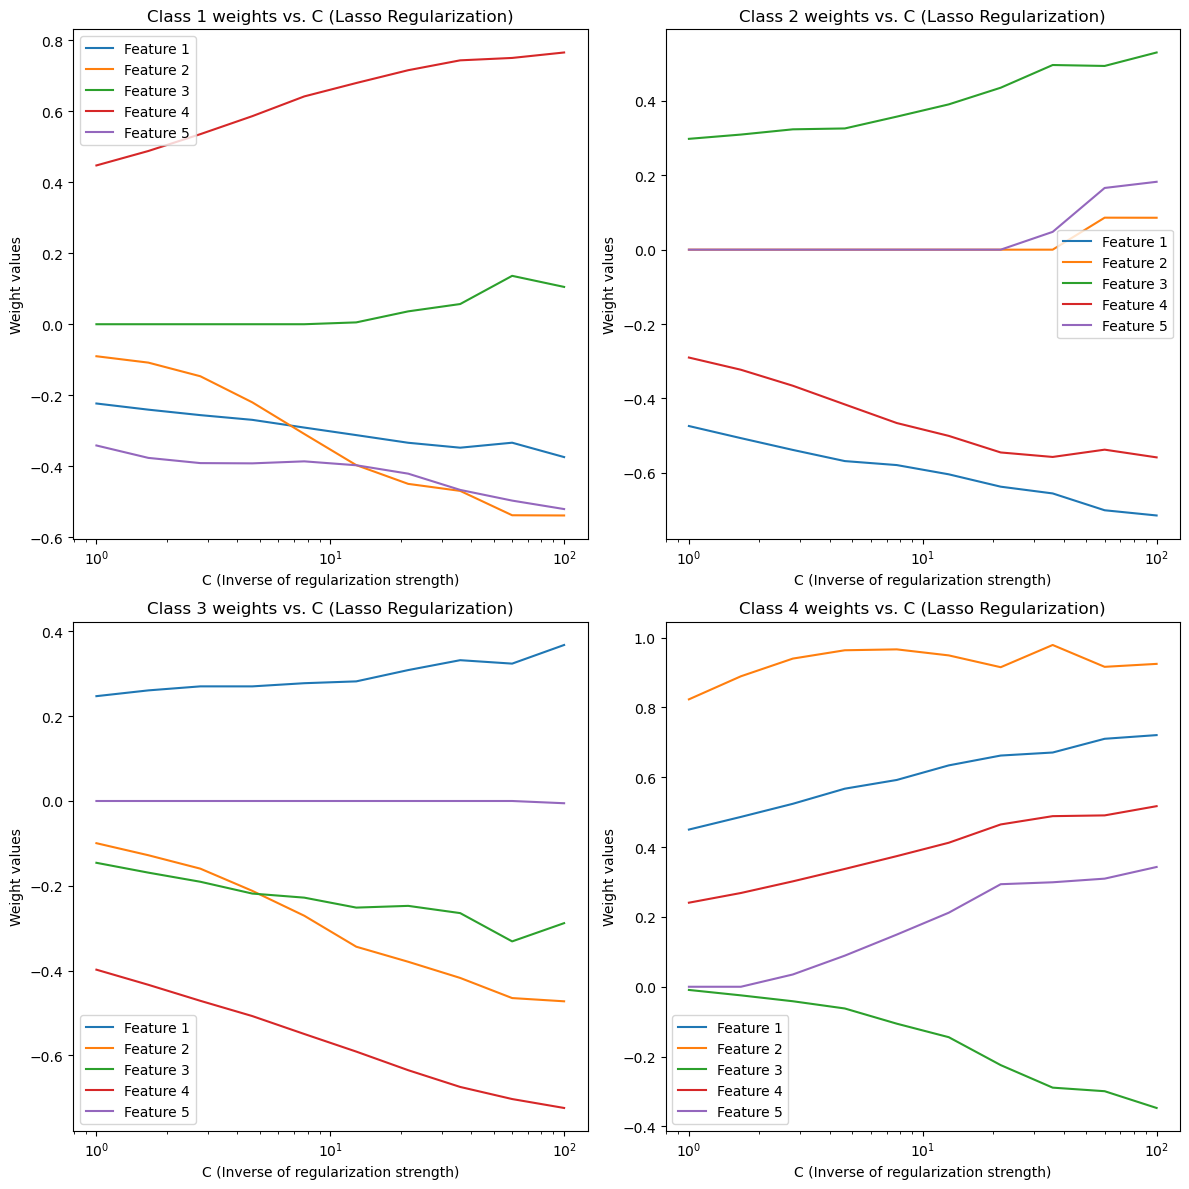

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

# Generate the dataset
X, y = make_blobs(n_samples=400, n_features=5, centers=4, cluster_std=2, random_state=100)

# Split into training data (using entire dataset for simplicity here)
X_train, y_train = X, y
# Initialize a list to store weights for each value of C
weights = []

# Vary C from 100 (weak penalty) to 1 (strong penalty)
C_values = np.logspace(2, 0, 10)  # C values from 100 to 1
for C in C_values:
    # Train the model with L1 penalty (Lasso)
    clf = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=10000)
    clf.fit(X_train, y_train)
    
    # Extract the coefficients (weights) and intercept  
    w = clf.coef_
    
    # Store the weights for plotting
    weights.append(w)

# Convert the list of weights into a numpy array for easier plotting
weights = np.array(weights)

# Plot weights versus C for each class
plt.figure(figsize=(12, 12))

# Loop over each class (4 classes)
for class_idx in range(weights.shape[1]):  # There are 4 classes
    plt.subplot(2, 2, class_idx + 1)  # Create 4 subplots (2x2 grid)
    
    # Plot each feature's weight for the current class
    for feature_idx in range(weights.shape[2]):  # There are 5 features
        plt.plot(C_values, weights[:, class_idx, feature_idx], label=f'Feature {feature_idx + 1}')
    
    plt.xscale('log')  # Use a logarithmic scale for C
    plt.xlabel('C (Inverse of regularization strength)')
    plt.ylabel('Weight values')
    plt.title(f'Class {class_idx + 1} weights vs. C (Lasso Regularization)')
    plt.legend()

plt.tight_layout()
plt.show()



### Part B
As we vary C and plot the weights, some of the features will have zero or near-zero weights, especially when the regularization strength is high. These features are considered unimportant for predicting the class label because their weights are reduced to zero. Lasso regularization achieves this by forcing less useful features to have zero weights.

Features with zero weights: These features are effectively ignored by the model, as they do not contribute to the prediction.
Features with non-zero weights: These are the important features, as they retain their influence on the classification task.
In the plot, the features with weights that go to zero as C increases can be regarded as unimportant.

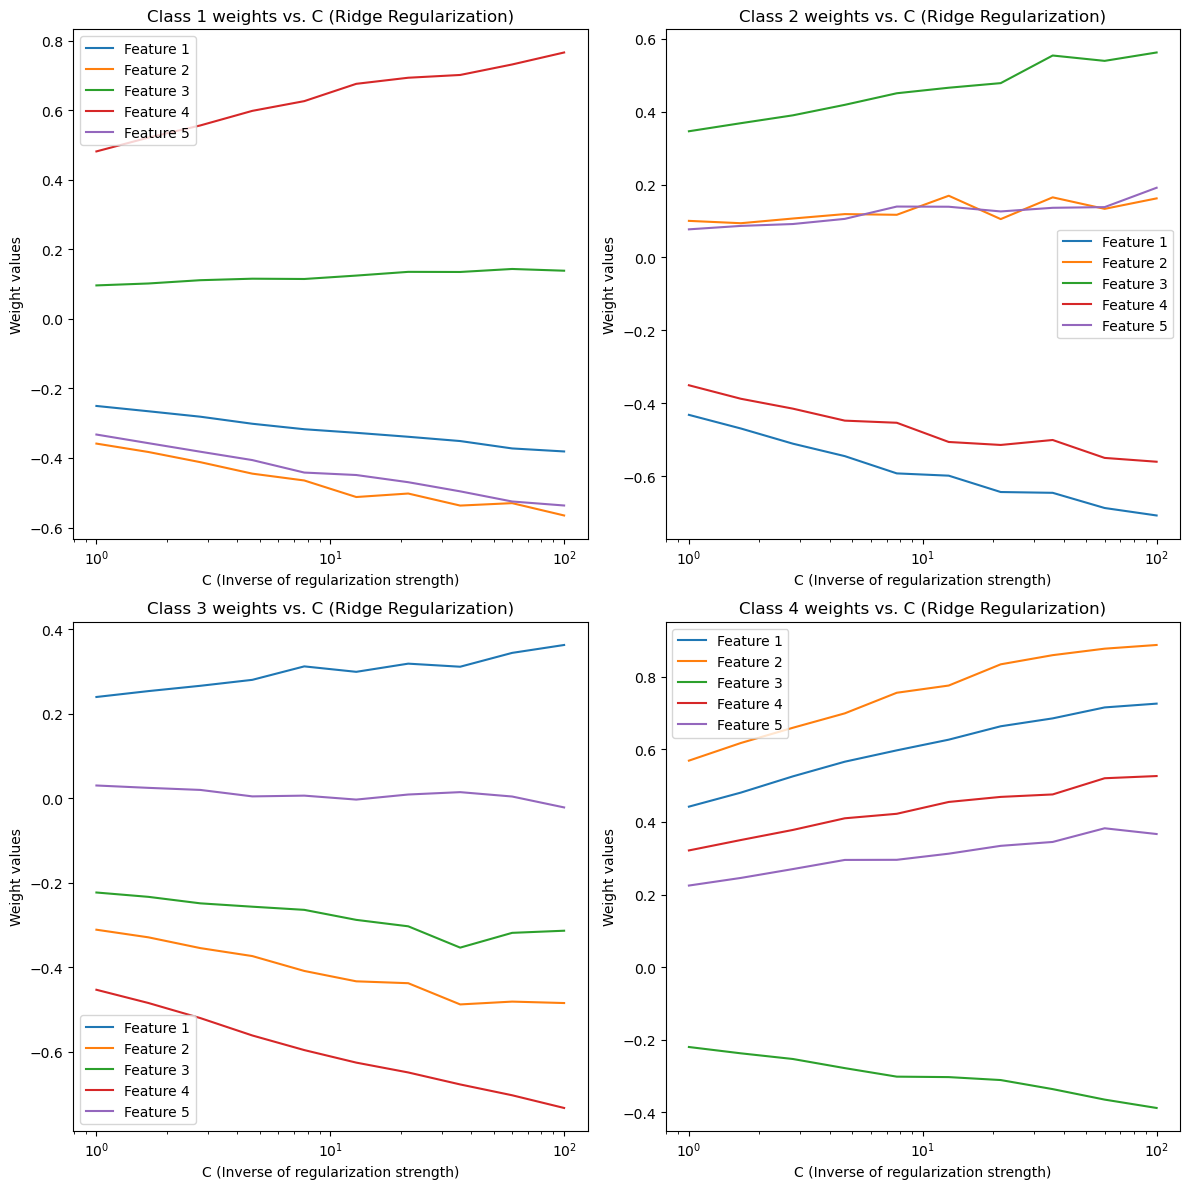

In [192]:
# List to store weights for each value of C using Ridge regularization
ridge_weights = []

# Train Ridge model (penalty='l2') for varying C values
for C in C_values:
    clf = LogisticRegression(penalty='l2', solver='saga', C=C, max_iter=10000)
    clf.fit(X_train, y_train)
    
    # Store the coefficients (weights)
    w = clf.coef_
    ridge_weights.append(w)

# Convert the list of weights into a numpy array for easier plotting
ridge_weights = np.array(ridge_weights)

# Plot weights versus C for each class (Ridge)
plt.figure(figsize=(12, 12))

# Loop over each class (4 classes)
for class_idx in range(ridge_weights.shape[1]):  # 4 classes
    plt.subplot(2, 2, class_idx + 1)  # 2x2 grid of subplots
    
    # Plot each feature's weight for the current class
    for feature_idx in range(ridge_weights.shape[2]):  # 5 features
        plt.plot(C_values, ridge_weights[:, class_idx, feature_idx], label=f'Feature {feature_idx + 1}')
    
    plt.xscale('log')  # Log scale for C
    plt.xlabel('C (Inverse of regularization strength)')
    plt.ylabel('Weight values')
    plt.title(f'Class {class_idx + 1} weights vs. C (Ridge Regularization)')
    plt.legend()

plt.tight_layout()
plt.show()

